# 911 Calls Capstone Project

## Data and Setup

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('911.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Info

**These are the 5 most frequent zipcodes that 911 was called from**

In [6]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**These are the 5 townships that sent the most 911 calls**

In [7]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

**These are the different types of incidents that 911 was called for**

In [8]:
df['title'].nunique

<bound method IndexOpsMixin.nunique of 0             EMS: BACK PAINS/INJURY
1            EMS: DIABETIC EMERGENCY
2                Fire: GAS-ODOR/LEAK
3             EMS: CARDIAC EMERGENCY
4                     EMS: DIZZINESS
                    ...             
99487    Traffic: VEHICLE ACCIDENT -
99488    Traffic: VEHICLE ACCIDENT -
99489               EMS: FALL VICTIM
99490           EMS: NAUSEA/VOMITING
99491    Traffic: VEHICLE ACCIDENT -
Name: title, Length: 99492, dtype: object>

**Here we created a new column that represents the reason why 911 was called**

In [9]:
df['Reason']=df['title'].apply(lambda reason: reason.split(':')[0])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


**Here are the most common reasons for a 911 calls**

In [10]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

In [11]:
import seaborn as sns

**This graph shows the number of 911 calls for each reason**

<AxesSubplot:xlabel='Reason', ylabel='count'>

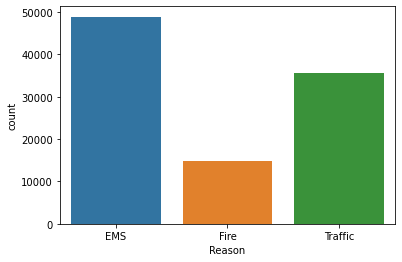

In [12]:
sns.countplot(x='Reason', data=df)

In [13]:
type(df['timeStamp'].iloc[0])

str

In [14]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [15]:
time = df['timeStamp'].iloc[0]

In [16]:
df['Hour'] = df['timeStamp'].apply(lambda time:time.hour)
df['Month'] = df['timeStamp'].apply(lambda time:time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time:time.dayofweek)

df['Day of Week'] = df['Day of Week'].astype(int)

In [17]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [18]:
df['Day of Week']=df['Day of Week'].map(dmap)

**This graph shows which reason 911 was called for and which day of the week it was called on.**

<AxesSubplot:xlabel='Day of Week', ylabel='count'>

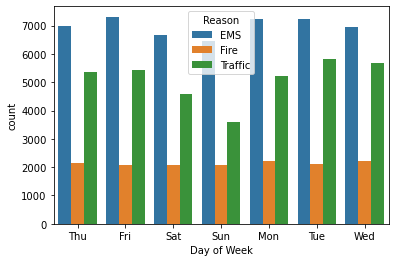

In [19]:
sns.countplot(x='Day of Week',data = df, hue = 'Reason')

**Here we made the same graph but my month rather than day of the week**

<AxesSubplot:xlabel='Month', ylabel='count'>

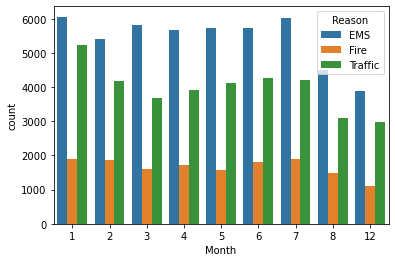

In [20]:
sns.countplot(x='Month', data=df, hue='Reason')

**Do you notice something strange about the Plot?**

**Some Months are missing, so we created a table that fills all of the months in**

In [21]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


**Here we created a simple plot that includes all of the months**

<AxesSubplot:xlabel='Month'>

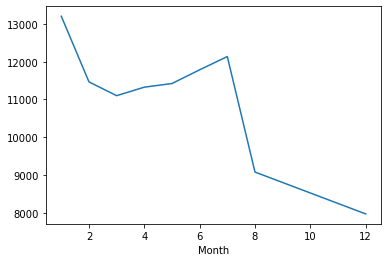

In [22]:
byMonth['lat'].plot(kind = "line")

**The graph below represents the average number of 911 calls per month**

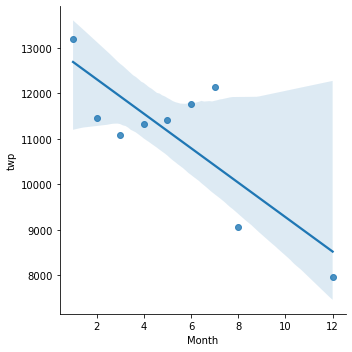

In [23]:
sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

**Here we created a new column in our data that represents the dates that 911 was called on** 

In [24]:
time = df['timeStamp'].iloc[0]
df['Date']=df['timeStamp'].apply(lambda time:time.date())
df.head(1)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


**This is a graph based on the date 911 was called.**

<AxesSubplot:xlabel='Date'>

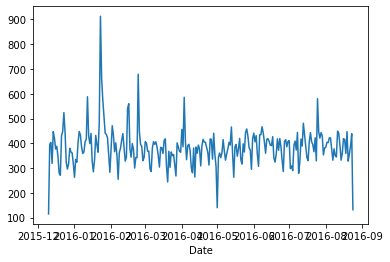

In [25]:
byDate = df.groupby('Date').count()
byDate['lat'].plot(kind='line')

**The next 3 graphs are each based on the different reasons 911 was called for by date**

**Graph#1: Traffic**

Text(0.5, 1.0, 'Traffic')

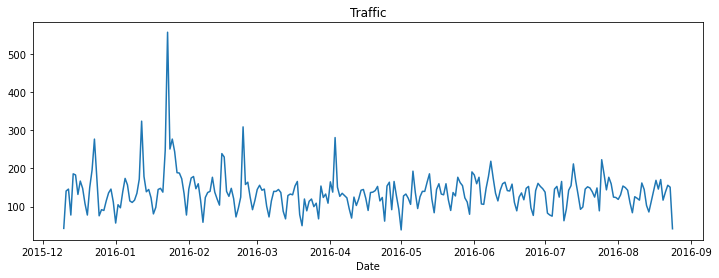

In [26]:
plt.figure(figsize=(12,4))
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')

**Graph#2:Fire**

Text(0.5, 1.0, 'Fire')

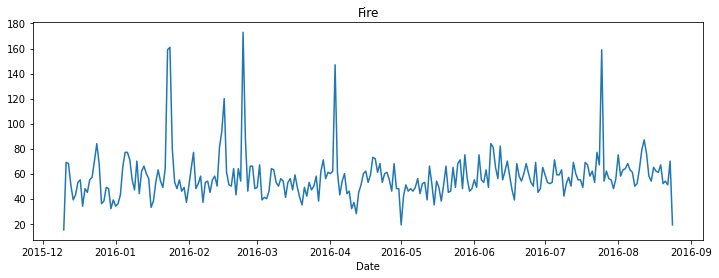

In [27]:
plt.figure(figsize=(12,4))
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')

**Graph#3:EMS**

Text(0.5, 1.0, 'EMS')

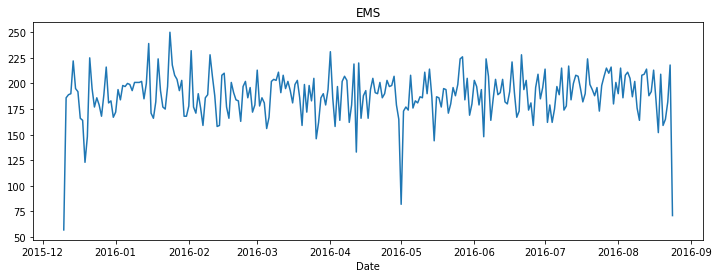

In [28]:
plt.figure(figsize=(12,4))
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')

**We created this table to show the number of 911 calls done in each hour of every day of the week.**

In [29]:
day_df = df.groupby(["Day of Week" , "Hour"])["Reason"].count().unstack()
day_df

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


**Then we created 2 different types of graphs to display the data**

**Graph#1**

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

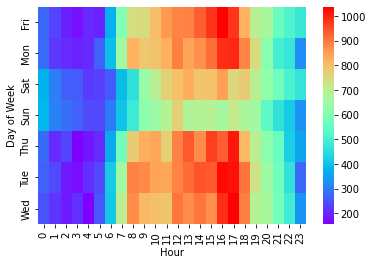

In [30]:
sns.heatmap(day_df, cmap='rainbow')

**Graph#2**

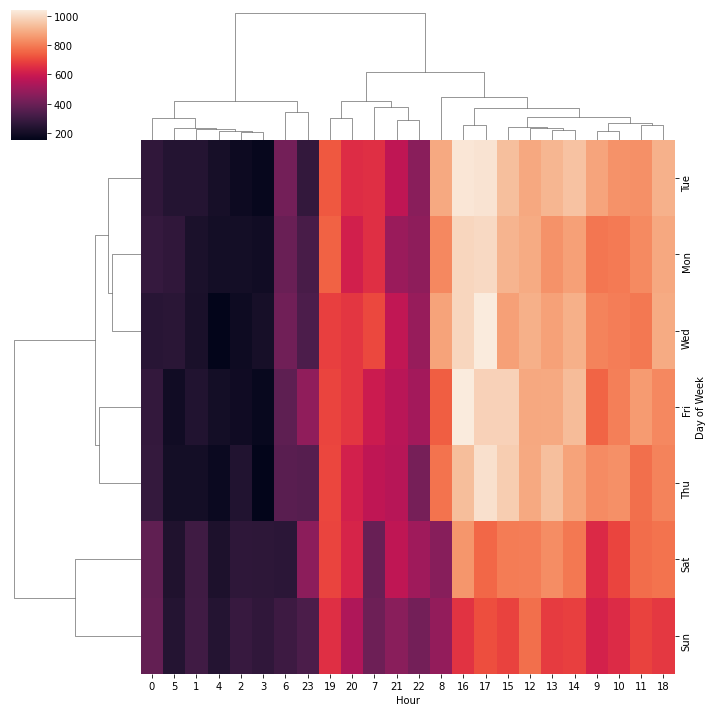

In [31]:
sns.clustermap(day_df)

**Here we created the previous table, but based on month rather than hour**

In [32]:
month_df = df.groupby(["Day of Week", "Month"])["Reason"].count().unstack()
month_df

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


**Graph#1**

<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

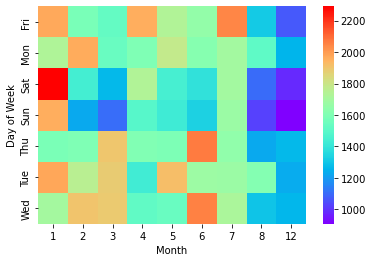

In [33]:
sns.heatmap(month_df, cmap='rainbow')

**Graph#2**

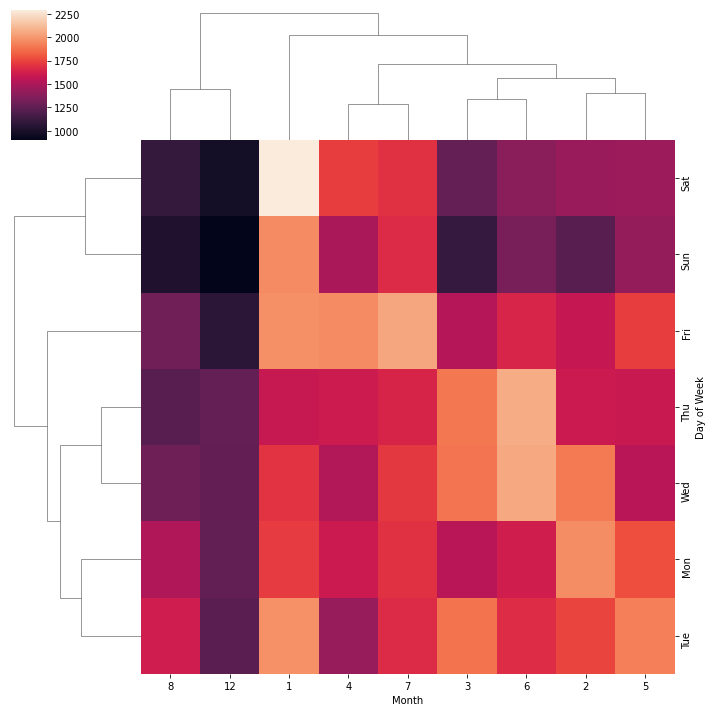

In [34]:
sns.clustermap(month_df)

In [35]:
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


**Continue exploring the Data however you see fit!**
# Great Job!